# Preprocessing Danych

## Brakujące wartości

### Wczytanie danych

W pierwszej kolejności wczytamy dane z pliku.

In [ ]:
import pandas as pd

df = pd.read_csv('data/crx.data', names=["A"+str(i) for i in range(1,17)])

df.info()

Zobaczmy, jak prezentuje się kilka początkowych wierszy danych.

In [ ]:
df.head()

### Analiza brakujących wartości

Kolejnym krokiem jest analiza brakujących wartości oraz podjęcie decyzji, w jaki sposób należy te wartości uzupełnić. Zobaczmy więc, w których kolumnach występują brakujące wartości oraz ile ich jest.

In [ ]:
df.isnull().sum()

Otrzymaliśmy 0 brakujących wartości. Nie oznacza to jednak, że zbiór danych pozbawiony jest brakujących wartości. W przypadku tego zbioru danych, brakujące wartości reprezentowane są, przy pomocy **?**. Musimy więc zastąpić te wartości, przy pomocy `np.nan`, dzięki czemu otrzymamy rzeczywisty obraz brakujących danych.

In [ ]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Jak widzimy, brakuje niewielkiej ilości danych i zazwyczaj brakujące dane dotyczą tych samych cech. Zobaczmy jeszcze, jak bardzo niewystępowanie danej cechy jest skorelowane z brakiem wartości innej cechy, korzystając z wykresu słupkowego z biblioteki `missingno`.

In [ ]:
import missingno as msno

msno.bar(df)

Jak możemy łatwo zauważyć, najczęściej równocześnie brakuje wartości w kolumnach **A1**, **A2** oraz **A14**.

### Usuwanie i wypełnianie brakujących danych

Jak widzimy, danych brakuje w kolumnach **A1**, **A2**, **A4**, **A5**, **A6**, **A7** oraz **A14**. Kolumny **A2** oraz **A14** zawierają dane ciągłe (liczbowe), natomiast kolumny **A1**, **A4**, **A5**, **A6**, **A7** zawierają dane kategoryczne.

#### Konwersja danych na odpowiedni typ

Jak możemy zauważyć, dane w niektórych kolumnach mają nieprawidłowy typ. Przed przystąpieniem do ich uzupełniania, skonwertujemy te dane na odpowiedni typ dla danej kolumny.

In [ ]:
df.dtypes

In [ ]:
data_types = {
  'A1': 'category',
  'A2': 'float64',
  'A3': 'float64',
  'A4': 'category',
  'A5': 'category',
  'A6': 'category',
  'A7': 'category',
  'A8': 'float64',
  'A9': 'category',
  'A10': 'category',
  'A11': 'float64',
  'A12': 'category',
  'A13': 'category',
  'A14': 'float64',
  'A15': 'float64',
  'A16': 'category'
}

df = df.astype(data_types)

Sprawdźmy jeszcze, czy dane w kolumnach otrzymały prawidłowe typy. Jak widzimy, rozmiar danych zmniejszył się o połowę, dzięki zastosowaniu prawidłowego kodowania.

In [ ]:
df.info()

#### Dane liczbowe

##### Kolumna A2

In [ ]:
df["A2"].describe()

Jak widzimy, średnia (31.568171) oraz mediana (28.460000) mają zbliżone wartości. Oznacza to, że rozkład jest zbliżony do normalnego i nie ma wartości odstających. W tym przypadku brakujące wartości można uzupełnić wartością średnią.

In [ ]:
df['A2'].fillna(df['A2'].mean(), inplace=True)

##### Kolumna A14

In [ ]:
df["A14"].describe()

W przypadku tej kolumny, średnia (184.014771) już bardziej zauważalnie odstaje od mediany (160.000000). Ponieważ różnica jest większa, zastąpienie brakujących wartości medianą będzie lepszym pomysłem.

In [ ]:
df['A14'].fillna(df['A14'].median(), inplace=True)

#### Dane kategoryczne

Ponieważ niewiele wierszy ma brakujące dane w analizowanym zbiorze danych, najlepszym sposobem na uzupełnienie brakujących danych kategorycznych będzie ich uzupełnienie, przy pomocy najczęściej występującej wartości. Oczywiście, moglibyśmy usunąć całe wiersze, w których brakuje danych, ale nie jest to najlepsze rozwiązanie, ponieważ w ten sposób moglibyśmy się pozbyć wierszy, zawierających cenne informacje.

In [ ]:
for column in ("A1", "A4", "A5", "A6", "A7"):
  df[column].fillna(df[column].mode()[0], inplace=True)

#### Sprawdzenie, czy wciąż brakuje wartości

Jak widać, udało nam się uzupełnić wszystkie brakujące wartości w zbiorze danych. W ten sposób zakończyliśmy pierwszy etap preprocessingu danych.

In [ ]:
df.isnull().sum()

## Macierz rozrzutu (scatter matrix)

Na poniższych wykresach widzimy jedynie dane numeryczne, ponieważ dane kategoryczne nie mogą zostać przedstawione w postaci takich wykresów.

Na poniższych wykresach trudno zaobserwować silny trend. W przypadku cech **A2** i **A3**, **A2** i **A8** oraz **A3** i **A8** daje się zaobserwować nieznaczną zależność cech, ponieważ punkty układają się wzdłuż prostej. 

In [ ]:
pd.plotting.scatter_matrix(df, diagonal='hist', figsize=(15, 15))
plt.show()

Korelację cech lepiej będzie się dało zauważyć, korzystając z wykresu typu **heatmap**.

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

Jak widzimy, w zbiorze danych nie ma silnych korelacji cech.

## Kodowanie wartości nominalnych

**Klasyfikator Naiwny Bayesa**
- Obie reprezentacje są dopuszczalne (nominalna i po zakodowaniu),
- Najlepiej radzi sobie z danymi kategorycznymi.
- Najlepiej działa z danymi niezależnymi od siebie (jak można zauważyć z heatmapy powyżej, dane w zdecydowanej większości są od siebie mało zależne),
- gdy cecha ma dużą ilość wartości kategorycznych to warto zastosować one hot encoding w celu zwiększenia dokładności klasyfikacji, ale w przypadku małej liczby wartości nie powinien mieć dużego wpływu na dokładność.

**Klas. k-NN**
- Obie reprezentacje są dopuszczalne,
- Warto zastosować one hot encoding w celu polepszenia wyników klasyfikacji, ale może zwiększyć czas obliczeń.

**Klas. SVM**
- Obie reprezentacje są dopuszczalne,
- Dzięki zastosowaniu One hot encodingu można zwiększyć dokładność predykcji, ale w niektóych przypadkach może prowadzić do overfittingu. Zwiększa to też czas obliczeń. W wielu przypadkach lepiej zastosować inny sposób kodowania (Ordinal encoding - inne wartości oprócz 0 i 1),
- Wybór reprezentacji ma mniejsze znaczenie niż w k-NN.

**Lasy losowe**
- Z obiema reprezentacjami radzi sobie dobrze,
- Jeżeli dane kategoryczną są od siebie zależne one hot encoding zmniejsza dokładność klasyfikacji.

### Kodowanie danych nominalnych

Przed przystąpieniem do preprocessingu danych, zakodujemy dane kategoryczne, korzystając z metody one-hot encoding.

In [ ]:
df.shape

In [ ]:
df = pd.get_dummies(data=df,columns=["A1","A4","A5","A6","A7","A9","A10","A12","A13"])
df.shape

Jak widzimy, otrzymany dataframe ma o 31 kolumn więcej od poprzedniego. Ponieważ operujemy na niewielkim zbiorze danych, możemy sobie pozwolić na taki wybór kodowania i znacząco zwiększona liczba kolumn nam nie przeszkadza, a może poprawić wyniki treningu.

In [ ]:
df.head()

## Preprocessing danych i dokładność klasyfikatorów

### Przygotowanie zbiorów danych

Przekształcimy teraz kolumnę, zawierającą oczekiwane wyniki predykcji na wartości boolowskie. Ze zbioru wykorzystywanego do treningu (**X**) usuwamy zbiór wyników (cech do przewidzenia). Zbiór **y**, zawierający prawidłowe wyniki predyjkcji.

In [ ]:
df["A16"] = (df["A16"] == "+").astype(np.int8)

In [ ]:
X = df.drop("A16", axis=1)
y = df["A16"]

X.head()

### Podział na zbiór treningowy i testowy

Przed przystąpieniem do preprocessingu danych, należy dokonać podziału zbioru danych na zbiór treningowy i testowy.

In [ ]:
# Podziel zbiór danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Skalowanie cech oraz testowanie dokładności klasyfikacji.

In [ ]:
from scipy import stats

def confidence_interval(scores):
  mean_score = np.mean(scores)
  std_score = np.std(scores)
  ci_lower, ci_upper = stats.t.interval(0.95, len(scores)-1, loc=mean_score, scale=std_score)
  return ci_lower, ci_upper

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

scalers = [None, StandardScaler(), MinMaxScaler()]

for scaler in scalers:
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    folds = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler_name = scaler.__class__.__name__ if scaler else "no scaler"
    
    knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=folds)
    print(f'KNN scores with {scaler_name}: {knn_scores}')
    print(f'KNN mean score with {scaler_name}: {np.mean(knn_scores)}')
    print(f'KNN confidence interval for {scaler_name}: {confidence_interval(knn_scores)}\n')
    
    rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=folds)
    print(f'Random Forest scores with {scaler_name}: {rf_scores}')
    print(f'Random Forest mean score with {scaler_name}: {np.mean(rf_scores)}')
    print(f'Random Forest confidence interval for {scaler_name}: {confidence_interval(rf_scores)}\n\n')

### Porównanie wyników

Zapiszmy najpierw wyniki w bardziej czytelnej postaci. Poniższa tabela zawiera zebrane wyniki wraz z 95% przedziałami ufności.

<table>
    <thead>
        <tr>
            <th></th>
            <th colspan="2">Bez skalowania</th>
            <th colspan="2">Normalizacja</th>
            <th colspan="2">Standaryzacja</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td></td>
            <td>KNN</td>
            <td>Random Forest</td>
            <td>KNN</td>
            <td>Random Forest</td>
            <td>KNN</td>
            <td>Random Forest</td>
        </tr>
        <tr>
            <td>Wynik</td>
            <td>0.688</td>
            <td>0.879</td>
            <td>0.837</td>
            <td>0.877</td>
            <td>0.869</td>
            <td>0.877</td>
        </tr>
        <tr>
            <td>Przedział ufności</td>
            <td>(0.516, 0.861)</td>
            <td>(0.788, 0.969)</td>
            <td>(0.709, 0.965)</td>
            <td>(0.781, 0.973)</td>
            <td>(0.694, 1.045)</td>
            <td>(0.777, 0.977)</td>
        </tr>
    </tbody>
</table>

Jak można łatwo zauważyć, w przypadku klasyfikatora KNN, wykorzystanie skalowania dało znaczącą poprawę wyniku (najlepszy wynik przy wykorzystaniu standaryzacji). W przypadku klasyfikatora Random Forest, wynik jest prawie taki sam dla przeskalowanych danych oraz dla danych bez skalowania. W przypadku klasyfikatora Random Forest, wykorzystanie skalowania nieznacznie pogarsza otrzymane wyniki.

## Wykresy

Wykresy wykonaliśmy dla klasyfikatora Random Forest z wykorzystaniem standard scalera.

### Precision-recall curve

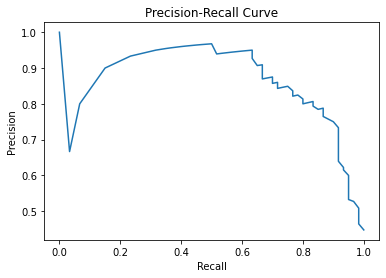

In [156]:
# Skalowanie danych treningowych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Tworzenie klasyfikatora Random Forest i wytrenowanie go na danych treningowych
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Skalowanie danych testowych
X_test = scaler.transform(X_test)

# Obliczanie precyzji i odzyskiwania dla różnych progów decyzyjnych
y_score = rfc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Tworzenie wykresu precision-recall
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Receiver operating characteristic